# Problem 2.11

In [1]:
! wget https://sethna.lassp.cornell.edu/StatMech/HintsAndMaterials/SandPConstantDollars.dat.zip

--2023-07-11 12:05:04--  https://sethna.lassp.cornell.edu/StatMech/HintsAndMaterials/SandPConstantDollars.dat.zip
Resolving sethna.lassp.cornell.edu (sethna.lassp.cornell.edu)... 64:ff9b::d076:fb19, 208.118.251.25
Connecting to sethna.lassp.cornell.edu (sethna.lassp.cornell.edu)|64:ff9b::d076:fb19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50645 (49K) [application/zip]
Saving to: ‘SandPConstantDollars.dat.zip’

SandPConstantDollar 100%[===================>]  49.46K   244KB/s    in 0.2s    

2023-07-11 12:05:04 (244 KB/s) - ‘SandPConstantDollars.dat.zip’ saved [50645/50645]



In [2]:
! unzip SandPConstantDollars.dat.zip

Archive:  SandPConstantDollars.dat.zip
  inflating: SandPConstantDollars.dat  


In [3]:
! rm SandPConstantDollars.dat.zip

In [10]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

## Part a.

In [5]:
data = np.loadtxt('SandPConstantDollars.dat')

In [15]:
dates = np.array(list(map(lambda x: dt.date(1982, 10, 15) + dt.timedelta(x), data[:, 0])))

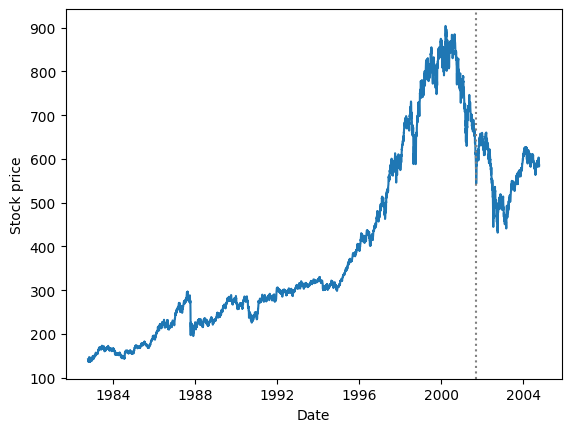

In [19]:
plt.plot(dates, data[:, 1])
plt.axvline(dt.date(2001, 9, 11), color='gray', linestyle=':')
plt.xlabel('Date')
plt.ylabel('Stock price');

The drop in the stock market appears to be unrelated to the September 11 attacks.

## Part b.

In [20]:
np.diff?

In [35]:
def percentage_delta(data, lag):
        return 100 * (data[lag:, 1] - data[:-lag, 1]) / data[:-lag, 1]

In [37]:
daily_changes = percentage_delta(data, lag=1)
weekly_changes = percentage_delta(data, lag=5)
yearly_changes = percentage_delta(data, lag=252)

In [39]:
daily_changes.shape

(5549,)

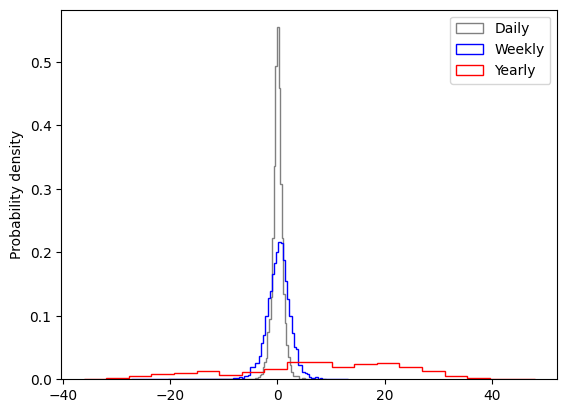

In [46]:
plt.hist(daily_changes, 100, histtype='step', color='gray', density=True, label='Daily')
plt.hist(weekly_changes, 100, histtype='step', color='blue', density=True, label='Weekly')
plt.hist(yearly_changes, 20, histtype='step', color='red', density=True, label='Yearly')
plt.ylabel('Probability density')
plt.legend();

In [47]:
np.mean(daily_changes) / np.std(daily_changes)

0.029367117519162222

In [48]:
np.mean(weekly_changes) / np.std(weekly_changes)

0.06810385124036657

In [49]:
np.mean(yearly_changes) / np.std(yearly_changes)

0.49281223337414376

It's only on the timescale of several years that the mean of the change in the S&P price exceeds the typical fluctuations.

## Part c.

$$
\begin{eqnarray}
\log \mathcal{N} & = & \log \left( \frac{1}{\sqrt{2\pi} \sigma} e^{-(x - \mu)^2 / 2\sigma^2} \right) \\
& = & -\frac{(x - \mu)^2}{2 \sigma^2} - \frac{1}{2} \log (2 \pi) \\
\end{eqnarray}
$$

In [54]:
X = np.linspace(-10, 10, num=1000)
Y = np.exp(-(X - np.mean(weekly_changes))**2 / (2 * np.std(weekly_changes)**2)) / np.sqrt(2 * np.pi) / np.std(weekly_changes)

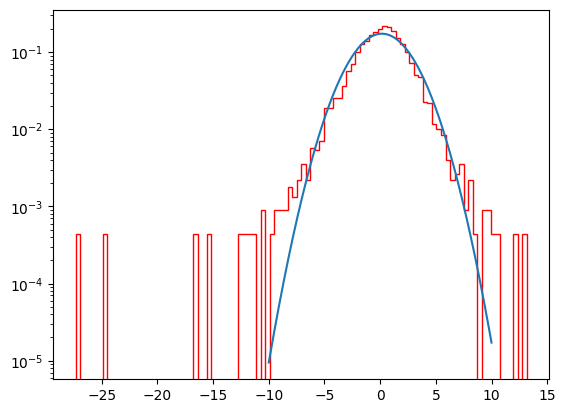

In [56]:
plt.hist(weekly_changes, 100, histtype='step', color='red', density=True)
plt.plot(X, Y)
plt.yscale('log')

## Part d.

In [58]:
daily_volatility = np.sqrt(np.mean((daily_changes - np.mean(daily_changes))**2))
weekly_volatility = np.sqrt(np.mean((weekly_changes - np.mean(weekly_changes))**2))
yearly_volatility = np.sqrt(np.mean((yearly_changes - np.mean(yearly_changes))**2))

In [59]:
daily_volatility

1.0606483448236002

In [60]:
weekly_volatility

2.291749421353568

In [61]:
yearly_volatility

15.723439026075111

In [65]:
lags = np.arange(1, 101)

In [64]:
volatilities = []
for lag in lags:
    changes = percentage_delta(data, lag=lag)
    volatility = np.sqrt(np.mean((changes - np.mean(changes))**2))
    volatilities.append(volatility)
volatilities = np.array(volatilities)

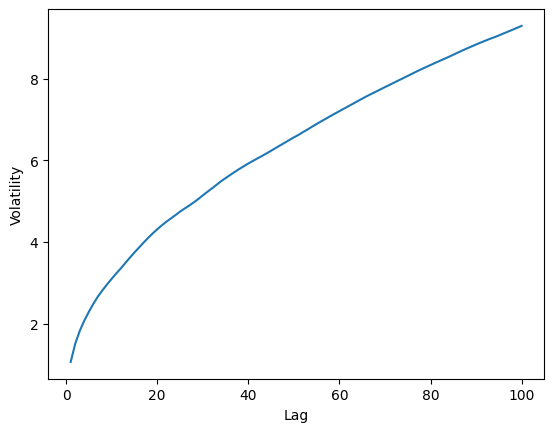

In [67]:
plt.plot(lags, volatilities)
plt.xlabel('Lag')
plt.ylabel('Volatility');

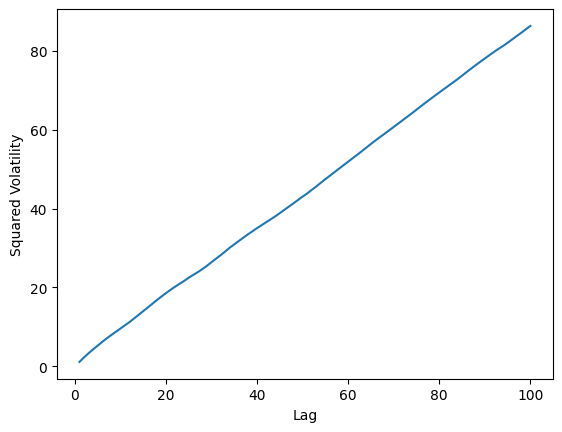

In [68]:
plt.plot(lags, volatilities**2)
plt.xlabel('Lag')
plt.ylabel('Squared Volatility');

The volatility as a function of lag is very nearly a linear relationship, which suggests that a random walk is a good model of stock market fluctuations on timescales of 100 days or less.

## Part e.

The mean of the index will still be $m$, but the volatility (if they are uncorrelated) will be $\sigma / \sqrt{500}$.  So without any extra information you can achieve the same return with lower volatiilty by buying the stocks in the index rather than individual stocks.